In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [3]:
death = pd.read_csv('data/celebrity_deaths.csv')
death.head()

,age,birth_year,cause_of_death,death_month,death_year,famous_for,name,nationality,fame_score
0,85,1921,natural causes,January,2006,businessman chairman of IBM (1973–1981),Frank Cary,American,6030.0
1,49,1957,murdered,January,2006,musician (House of Freaks Gutterball),Bryan Harvey,American,5867.0
2,64,1942,Alzheimer's disease,January,2006,baseball player (Oakland Athletics),Paul Lindblad,American,6711.0
3,86,1920,Alzheimer's disease,January,2006,politician Representative from Oregon (1957–1...,Charles O. Porter,American,6330.0
4,82,1924,cancer,January,2006,nightclub owner (Tropicana Club),Ofelia Fox,Cuban,4353.0


In [4]:
# clean data set
death_all = death.copy()
def group_deathcause(cause):
    mod_cause = ""
    cause = str(cause)
    if "cancer" in cause:
        mod_cause = "cancer"
    elif "heart" in cause or "cardiac" in cause:
        mod_cause = "heart disease"
    elif "stroke" in cause :
        mod_cause = "stroke"
    elif "diabetes" in cause:
        mod_cause = "diabetes"
    elif "gunshot" == cause:
        mod_cause = "shot"
    elif "suicide" in cause:
        mod_cause = "suicide"
    else:
        mod_cause = cause
    return mod_cause.strip()

def age_categorizer(age):
    category = ""
    if (age<18):
        category = "child"
    elif (age<30):
        category = "young"
    elif (age<60) :
        category = "adult"
    else:
        category = "old"
    return category

death_all.drop(death_all[death_all.age == 0].index)
death_all['cause_of_death'].fillna('unknown', inplace=True)
death_all['age_category'] = death_all.apply(lambda x: age_categorizer(x['age']), axis=1 )
death_all['cause_of_death'] = death_all.apply(lambda x: group_deathcause(x['cause_of_death']), axis=1 )


death_all

,age,birth_year,cause_of_death,death_month,death_year,famous_for,name,nationality,fame_score,age_category
0,85,1921,natural causes,January,2006,businessman chairman of IBM (1973–1981),Frank Cary,American,6030.0,old
1,49,1957,murdered,January,2006,musician (House of Freaks Gutterball),Bryan Harvey,American,5867.0,adult
2,64,1942,Alzheimer's disease,January,2006,baseball player (Oakland Athletics),Paul Lindblad,American,6711.0,old
3,86,1920,Alzheimer's disease,January,2006,politician Representative from Oregon (1957–1...,Charles O. Porter,American,6330.0,old
4,82,1924,cancer,January,2006,nightclub owner (Tropicana Club),Ofelia Fox,Cuban,4353.0,old
5,52,1954,stroke,January,2006,New Guinean politician Prime Minister (1997–1...,Sir William Skate,Papua,6383.0,adult
6,31,1975,probably pulmonary embolism,January,2006,footballer (soccer player),Gábor Zavadszky,Hungarian,4175.0,adult
7,31,1975,from injuries sustained in a biking accident,January,2006,football (soccer) player,José Luis Sánchez,Argentine,5103.0,adult
8,55,1951,unknown,January,2006,inventor (KISS rebreather),Gordon Smith,Canadian,3475.0,adult
9,70,1936,cancer,January,2006,actor (The Guiding Light),Don Stewart,American,3936.0,old


In [5]:
# Does the number of celebrities death is highest in 2016?

death_2016 = death_all[death_all.death_year == 2016]
death_other_years = death_all.drop(death_all[death_all.death_year == 2016].index)


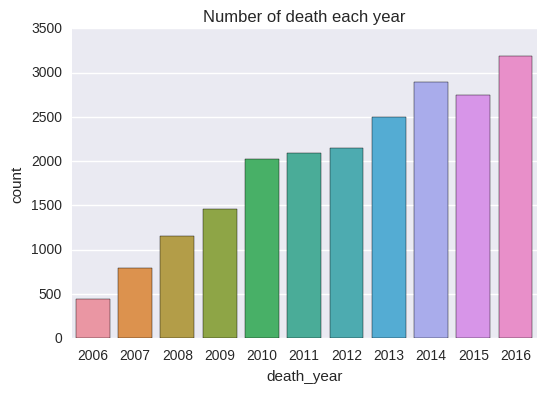

In [6]:
sns.countplot(death_all.death_year)
plt.title('Number of death each year')

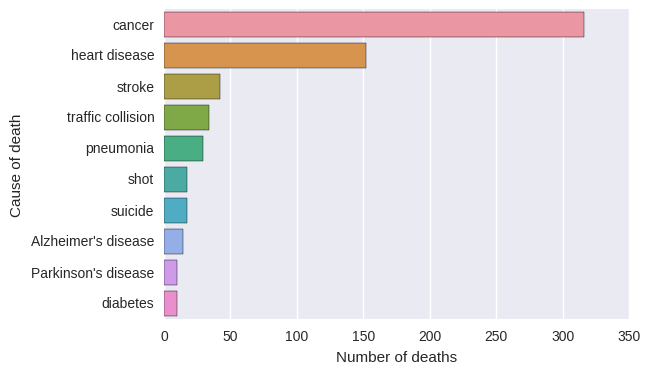

In [7]:
# reason for celebrities death in 2016
def known_cod(data, group_column):
    death_by_cod = data[data.cause_of_death != 'unknown'].groupby(group_column)['name'].count().reset_index()
    death_by_cod = death_by_cod.rename(columns={'name':'count'})
    total = death_by_cod['count'].sum()
    death_by_cod['ratio'] = death_by_cod.apply(lambda x: x['count']/total, axis=1)
    return death_by_cod.sort_values(by='ratio', ascending=False)

# plot it!

death_by_cod_2016 = known_cod(death_2016, 'cause_of_death')
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='count', y='cause_of_death', data=death_by_cod_2016.head(10))
ax.set(xlabel='Number of deaths', ylabel='Cause of death' )



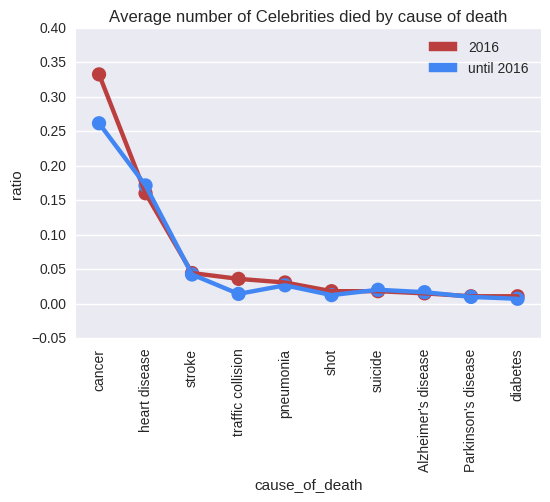

In [8]:
# How the top causes of death in 2016 are different from previous years?
death_other_years_by_cod = known_cod(death_other_years, 'cause_of_death').rename(columns={'ratio':'before2016ratio'})[['cause_of_death', 'before2016ratio']]
cod_ratio = pd.merge(death_by_cod_2016, death_other_years_by_cod, on='cause_of_death', how='left')

ax = sns.pointplot(x='cause_of_death', y='ratio', data=cod_ratio.head(10), color="#bb3f3f", label="2016")
sns.pointplot(x="cause_of_death", y="before2016ratio", data=cod_ratio.head(10),color="#4286f4", label="before_2016")
ax.set_xticklabels(rotation=90, labels=cod_ratio.cause_of_death)
ax.set(ylabel='ratio')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color="#bb3f3f", label='2016')
blu_patch = mpatches.Patch(color="#4286f4", label='until 2016')
plt.legend(handles=[red_patch,blu_patch])
plt.title("Average number of Celebrities died by cause of death")


